In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")
import sklearn

# Loading and splitting data

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1, cache = True)

In [4]:
X, y = pd.DataFrame(mnist["data"]), pd.Series(mnist["target"])

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Random forest classifier

In [5]:
from sklearn.ensemble import RandomForestClassifier

rf_mod = RandomForestClassifier(random_state = 42, n_jobs = -1)

rf_mod.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [6]:
from sklearn.model_selection import cross_val_score

cross_val_score(rf_mod, X_train, y_train, cv = 5, scoring = "accuracy", n_jobs = -1)

array([0.96607143, 0.96785714, 0.96883929, 0.96705357, 0.96553571])

In [79]:
from sklearn.model_selection import cross_val_predict

y_pred_rf = cross_val_predict(rf_mod, X_train, y_train, cv = 5, n_jobs = -1)

In [80]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_train, y_pred_rf)

np.fill_diagonal(conf_mat, 0)

conf_mat

array([[ 0,  1,  5,  3,  3,  9, 19,  1, 33,  2],
       [ 2,  0, 37, 15, 11,  6,  8,  8, 11,  8],
       [22,  8,  0, 25, 30,  3, 16, 40, 33,  5],
       [ 5,  6, 76,  0,  2, 64,  7, 41, 53, 24],
       [10,  7,  5,  0,  0,  2, 27,  9, 14, 78],
       [18,  2,  4, 61,  9,  0, 40,  6, 35, 21],
       [28, 13,  5,  1, 10, 32,  0,  0, 23,  0],
       [ 6, 17, 52,  9, 32,  1,  0,  0, 14, 67],
       [15, 27, 25, 37, 24, 37, 25,  5,  0, 62],
       [23, 10, 11, 69, 66, 18,  5, 47, 38,  0]], dtype=int64)

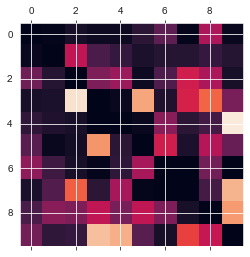

In [81]:
plt.matshow(conf_mat)

In [82]:
from sklearn.metrics import accuracy_score

rf_mod.fit(X_train, y_train)
y_pred_rf = cross_val_predict(rf_mod, X_train, y_train, cv = 5, n_jobs = -1)

accuracy_score(y_train, y_pred_rf)

0.9670714285714286

### Adding variable including number of loops in number

In [6]:
def num_loops(x):
    if pd.to_numeric(x) == 8:
        return 2
    elif pd.to_numeric(x) == 6:
        return 1
    elif pd.to_numeric(x) == 9:
        return 1
    else:
        return 0

In [7]:
X_train["loops"], X_test["loops"] = y_train.apply(num_loops), y_test.apply(num_loops)

C:\Users\wlamc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [85]:
rf_mod.fit(X_train, y_train)

y_pred_rf = cross_val_predict(rf_mod, X_train, y_train, cv = 5, n_jobs = -1)

accuracy_score(y_train, y_pred_rf)

0.9807678571428572

###### Got it ! We can see slight improvement ! This model has very high accuracy.

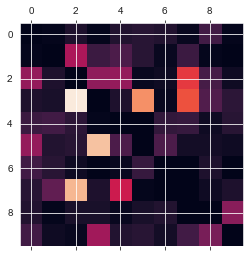

In [86]:
conf_mat = confusion_matrix(y_train, y_pred_rf)

np.fill_diagonal(conf_mat, 0)

plt.matshow(conf_mat)

In [69]:
conf_mat

array([[ 0,  1,  6,  1,  7,  8,  7,  2, 13,  1],
       [ 1,  0, 32, 12, 15,  8,  2, 12,  1,  0],
       [28,  6,  0, 27, 28,  2,  3, 44, 14,  3],
       [ 6,  5, 75,  0,  6, 58,  2, 48, 16,  9],
       [12, 13,  9,  1,  0,  0, 10, 11,  3,  8],
       [28,  7,  8, 67, 15,  0, 15,  4,  4,  3],
       [13,  8,  3,  0,  2, 11,  0,  0,  6,  0],
       [ 8, 19, 65,  6, 38,  1,  0,  0,  3,  6],
       [ 7,  1,  5,  5,  2,  5,  7,  0,  0, 26],
       [13,  3,  2, 30,  7,  8,  4, 13, 23,  0]], dtype=int64)

### Test accuracy

In [87]:
rf_mod.fit(X_train, y_train)

test_pred = rf_mod.predict(X_test)

accuracy_score(y_test, test_pred)

0.9813571428571428

## K nearest neighbors classifier

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn_mod = KNeighborsClassifier(n_jobs = -1)
knn_mod.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [12]:
cross_val_score(knn_mod, X_train, y_train, cv = 5, n_jobs = -1)

array([0.96705357, 0.96946429, 0.97151786, 0.96866071, 0.96714286])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  7.8min finished


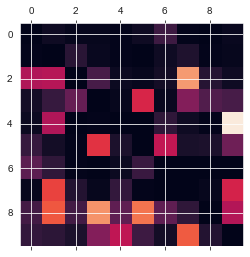

In [15]:
y_pred_knn = cross_val_predict(knn_mod, X_train, y_train, cv = 3, n_jobs = -1, verbose = 3)

conf_mat = confusion_matrix(y_train, y_pred_knn)

np.fill_diagonal(conf_mat, 0)

plt.matshow(conf_mat)

In [16]:
from sklearn.model_selection import GridSearchCV

In [18]:
knn_mod = KNeighborsClassifier(n_jobs = -1)

param_grid = [
    {"weights": ["uniform"], 
     "n_neighbors": [1, 3, 5]},
    {"weights": ["distance"],
     "n_neighbors": [2, 4]}]

grid_search = GridSearchCV(knn_mod, param_grid, cv = 3, verbose = 3, n_jobs = -1)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed: 32.1min remaining: 88.2min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed: 32.1min remaining: 16.1min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 39.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=-1,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 3, 5], 'weights': ['uniform']},
                         {'n_neighbors': [2, 4], 'weights': ['distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [20]:
grid_search.best_score_

0.9705892646492343

In [21]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
                     weights='distance')

In [23]:
best_knn_mod = grid_search.best_estimator_

### Test accuracy 

In [27]:
best_knn_pred = best_knn_mod.predict(X_test)

accuracy_score(y_test, best_knn_pred)

0.9731428571428572